PROJECT OBJECTIVE: Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A2D8-5F36

 Directory of C:\Users\Administrator\Desktop\Statistical Learning\SL projects

03/12/2024  06:51 AM    <DIR>          .
03/12/2024  06:51 AM    <DIR>          ..
03/10/2024  07:52 PM    <DIR>          .ipynb_checkpoints
03/10/2024  01:38 PM             3,349 DS+-+Part2+-+Basketball.csv
03/10/2024  01:38 PM            42,594 DS+-+Part3+-+CompanyX_EU.csv
03/10/2024  03:20 PM            36,107 Sample+Solution+STL_Part+A.ipynb
03/10/2024  07:48 PM            64,624 Sample+Solution+STL_Part+B.ipynb
03/10/2024  08:10 PM            73,716 Sample+Solution+STL_Part+C.ipynb
03/10/2024  01:38 PM           347,984 SL_Problem Statement.pdf
03/12/2024  06:51 AM            30,525 TeamTrack Analytics.ipynb
03/10/2024  07:58 PM             8,034 Untitled.ipynb
               8 File(s)        606,933 bytes
               3 Dir(s)  65,791,901,696 bytes free


In [3]:
data = pd.read_csv('DS+-+Part2+-+Basketball.csv')

In [4]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [6]:
data.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [7]:
columns = ['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld']

In [8]:
for x in columns:
    print(data[x].unique())

[86 80 82 73 70 58 51 45 42 44 43 37 36 38 27 33 17 23 21 12 20 13 18 11
 14  9  7  6  4  5  3  2  1]
['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '190' '188' '168' '150' '148' '132'
 '107' '96' '91' '83' '81' '76' '71' '56' '52' '42' '40' '35' '34' '22'
 '19' '14' '-']
['2762' '2614' '2664' '2408' '2626' '2302' '1986' '1728' '1530' '1698'
 '1466' '1428' '1458' '1318' '1255' '1192' '988' '1096' '646' '742' '652'
 '678' '456' '628' '494' '586' '380' '402' '423' '426' '448' '346' '334'
 '270' '228' '282' '160' '186' '204' '180' '152' '114' '130' '116' '80'
 '108' '90' '72' '68' '54' '38' '30' '-']
['1647' '1581' '1241' '1187' '1209' '990' '948' '864' '698' '606' '563'
 '586' '463' '453' '471' '426' '390' '408' '333' '367' '266' '218' '189'
 '203' '147' '184' '155' '145' '125' '113' '1

# Data Cleansing

In [9]:
data = data.replace('-',0)

In [10]:
data['TeamLaunch'] = data['TeamLaunch'].str.replace(r'(to|_|~)', '-', regex=True)

In [11]:
data['TeamLaunch'].unique()

array(['1929', '1931-32', '1934-35', '1939-40', '1932-33', '1941-42',
       '1948-49', '1944-45', '1935-36', '1949-50', '1933-34', '1960-61',
       '1951-52', '1998-99', '1977-78', '1959-60', '2004-05', '1961-62',
       '1940-41', '1930-31', '1963-64', '1974-75', '1943-44', '1987-88',
       '1991-92', '2007-08', '1962-63', '1994-95', '1978-79', '1971-72',
       '1999-00', '2014-15', '1990-91', '1947-48', '1996-97', '1995-96',
       '1945-46', '1953-54', '1979-80', '1950-51', '2016-17', '2009-10',
       '1956-57', '1955-56', '2017-18'], dtype=object)

In [12]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951-52,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017-18,9


In [13]:
data = data[data["Team"]!= "Team61"]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.7+ KB


In [15]:
columns = [ 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch',]

In [21]:
data['TeamLaunch'] = data['TeamLaunch'].str.split('-').str[0]

In [23]:
data["TeamLaunch"] = data['TeamLaunch'].astype('int64')

In [24]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [25]:
for i in columns:
    data[i] = data[i].astype('int64')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.7+ KB


#  Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data driven insights

In [29]:
data_new = data.copy()

In [30]:
data_new.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [31]:
# Age of the Team - Assumption the data is from the year 2019

data_new['Age']  = 2019 - data_new["TeamLaunch"]

In [32]:
data_new['WinRate'] = data_new['WonGames']/data_new['PlayedGames']

In [33]:
data_new['Champrate'] = data_new['TournamentChampion']/data_new['Tournament']

In [34]:
data_new.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Age,WinRate,Champrate
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,90,0.596307,0.383721
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,90,0.572411,0.290698
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,90,0.474751,0.125000
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,88,0.445571,0.073171
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,90,0.437726,0.093023


In [47]:
df1 = data_new[['Team','Age','WinRate','Champrate']]

In [48]:
df1.head(10)

,Team,Age,WinRate,Champrate
0,Team 1,90,0.596307,0.383721
1,Team 2,90,0.572411,0.290698
2,Team 3,90,0.474751,0.125000
3,Team 4,88,0.445571,0.073171
4,Team 5,90,0.437726,0.093023
5,Team 6,85,0.411130,0.013699
6,Team 7,90,0.361005,0.000000
7,Team 8,90,0.375326,0.028571
8,Team 9,80,0.351460,0.000000
9,Team 10,87,0.350694,0.019608


# Youngest teams

In [49]:
df1.sort_values(by = 'Age',ascending =True).head(10)

,Team,Age,WinRate,Champrate
60,Team 61,2,NaN,0.0
55,Team 56,3,0.210526,0.0
43,Team 44,5,0.307018,0.0
56,Team 57,10,0.210526,0.0
36,Team 37,12,0.271930,0.0
24,Team 25,15,0.322368,0.0
42,Team 43,20,0.243421,0.0
20,Team 21,21,0.411765,0.0
47,Team 48,23,0.250000,0.0
48,Team 49,24,0.237500,0.0


# Oldest team

In [50]:
df1.sort_values(by = 'Age',ascending =False).head(10)

,Team,Age,WinRate,Champrate
0,Team 1,90,0.596307,0.383721
7,Team 8,90,0.375326,0.028571
1,Team 2,90,0.572411,0.290698
53,Team 54,90,0.333333,0.000000
13,Team 14,90,0.317227,0.000000
44,Team 45,90,0.330769,0.000000
51,Team 52,90,0.291667,0.000000
6,Team 7,90,0.361005,0.000000
4,Team 5,90,0.437726,0.093023
2,Team 3,90,0.474751,0.125000


# Top performing 

In [51]:
df1.sort_values(by = 'WinRate',ascending =True).head(10)

,Team,Age,WinRate,Champrate
59,Team 60,64,0.166667,0.0
54,Team 55,69,0.191176,0.0
56,Team 57,10,0.210526,0.0
55,Team 56,3,0.210526,0.0
45,Team 46,29,0.228070,0.0
32,Team 33,42,0.232143,0.0
57,Team 58,63,0.233333,0.0
58,Team 59,68,0.233333,0.0
48,Team 49,24,0.237500,0.0
42,Team 43,20,0.243421,0.0


# Low performing teams

In [52]:
df1.sort_values(by = 'WinRate',ascending =False).head(10)

,Team,Age,WinRate,Champrate
0,Team 1,90,0.596307,0.383721
1,Team 2,90,0.572411,0.290698
2,Team 3,90,0.474751,0.125000
3,Team 4,88,0.445571,0.073171
4,Team 5,90,0.437726,0.093023
20,Team 21,21,0.411765,0.000000
5,Team 6,85,0.411130,0.013699
7,Team 8,90,0.375326,0.028571
10,Team 11,78,0.367974,0.022222
6,Team 7,90,0.361005,0.000000


In [54]:
# The highest Winrate in the Entire Team is 59% held by Team1(Age = 90) And Lowest WInrate is 16% held by Team60(Age = 64)

In [56]:
df2 = df1.sort_values(by = "WinRate",ascending = False)# Top performing teams
df2.sort_values(by = "Age",ascending = True).head(10) # Top performing young teams

,Team,Age,WinRate,Champrate
60,Team 61,2,NaN,0.0
55,Team 56,3,0.210526,0.0
43,Team 44,5,0.307018,0.0
56,Team 57,10,0.210526,0.0
36,Team 37,12,0.271930,0.0
24,Team 25,15,0.322368,0.0
42,Team 43,20,0.243421,0.0
20,Team 21,21,0.411765,0.0
47,Team 48,23,0.250000,0.0
48,Team 49,24,0.237500,0.0


In [57]:
df2 = df1.sort_values(by = "WinRate",ascending = False)# Top performing teams
df2.sort_values(by = "Age",ascending = False).head(10) # Top performing old teams

,Team,Age,WinRate,Champrate
0,Team 1,90,0.596307,0.383721
51,Team 52,90,0.291667,0.000000
2,Team 3,90,0.474751,0.125000
4,Team 5,90,0.437726,0.093023
1,Team 2,90,0.572411,0.290698
7,Team 8,90,0.375326,0.028571
44,Team 45,90,0.330769,0.000000
6,Team 7,90,0.361005,0.000000
53,Team 54,90,0.333333,0.000000
13,Team 14,90,0.317227,0.000000


In [61]:
import plotly.express as px
fig = px.scatter(data_new,x = "Team",y = 'WinRate',color = "Team")
fig.show()

In [64]:
import plotly.express as px
fig = px.scatter(data_new,x = "Team", y = "WinRate",color = 'Age')
fig.show()

In [74]:
# Young vs old team's performance

fig = px.scatter(data_new, x="Team", y="WinRate",size="Age",color = "Team")
fig.show()

Observations: 
 
- Young and old teams with similar performance 

    - Team 6:
        1. Win Rate: 41%
        2. Highest Position: 1
        3. Age: 85
    - Team 21:
        1. Win Rate: 41%
        2. Highest Position: 2
        3. Age: 21

- Young teams with similar performance


    - Team 57:
        1. Win Rate: 21%%
        2. Highest Position: 20
        3. Age: 10
    - Team 56:
        1. Win Rate: 21%
        2. Highest Position: 17
        3. Age: 3
        
There are many columns available with many combinations.  

In [75]:
import plotly.express as px
fig = px.box(data_new,y='Age')  # Mix match columns and comment on the statistical distribution
fig.show()

In [78]:
import plotly.express as px
fig = px.histogram(data_new, x="Age")  # Mix match columns and comment on the statistical distribution
fig.show()

In [80]:
import plotly.express as px
fig = px.pie(data_new, values='Age', names='Team') # Mix match columns and comment on functional findings
fig.show()

- Observation:
    - Majority of the teams are from age 40 to 85

In [81]:
data_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.000000,4.000000,12.000000,38.000000,86.000000
Score,61.0,901.426230,1134.899121,0.000000,96.000000,375.000000,1351.000000,4385.000000
PlayedGames,61.0,796.819672,876.282765,0.000000,114.000000,423.000000,1318.000000,2762.000000
WonGames,61.0,303.967213,406.991030,0.000000,34.000000,123.000000,426.000000,1647.000000
DrawnGames,61.0,188.934426,201.799477,0.000000,24.000000,95.000000,330.000000,633.000000
LostGames,61.0,303.754098,294.708594,0.000000,62.000000,197.000000,563.000000,1070.000000
BasketScored,61.0,1140.344262,1506.740211,0.000000,153.000000,430.000000,1642.000000,5947.000000
BasketGiven,61.0,1140.229508,1163.710766,0.000000,221.000000,632.000000,1951.000000,3889.000000
TournamentChampion,61.0,1.426230,5.472535,0.000000,0.000000,0.000000,0.000000,33.000000
Runner-up,61.0,1.409836,4.540107,0.000000,0.000000,0.000000,0.000000,25.000000


In [82]:
import plotly.express as px
fig = px.histogram(data_new, x="HighestPositionHeld")  # Mix match columns and comment on the statistical distribution
fig.show()

In [84]:
import plotly.express as px
fig = px.box(data_new,y='HighestPositionHeld')  # Mix match columns and comment on the statistical distribution
fig.show()

In [86]:
data_new.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Age,WinRate,Champrate
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.589072,0.645876,-0.603151,-0.708071,0.603151,0.819559,0.600658
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.543432,-0.669775,0.543432,0.877385,0.725019
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.574716,0.632921,-0.587451,-0.710876,0.587451,0.813179,0.586586
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.543854,-0.648628,0.543854,0.884278,0.762040
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.577616,-0.719845,0.577616,0.774416,0.516602
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.600513,-0.725149,0.600513,0.665366,0.338187
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.553453,-0.649455,0.553453,0.879124,0.752690
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.615715,-0.726610,0.615715,0.757279,0.484105
TournamentChampion,0.589072,0.714280,0.574716,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.284878,-0.305397,0.284878,0.765351,0.999453
Runner-up,0.645876,0.764278,0.632921,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.315881,-0.360408,0.315881,0.801247,0.973634


In [88]:
import plotly.express as px
fig = px.box(data_new,y='Score')  # Mix match columns and comment on the statistical distribution
fig.show()

In [89]:
import plotly.express as px
fig = px.scatter(data_new, x="PlayedGames", y="WonGames")
fig.show()

- Example insights:
    - Linear relationship found.
    -  Exact correlation can be found using a corr() plot

In [90]:
data.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.589072,0.645876,-0.603151,-0.708071
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.543432,-0.669775
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.574716,0.632921,-0.587451,-0.710876
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.543854,-0.648628
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.577616,-0.719845
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.600513,-0.725149
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.553453,-0.649455
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.615715,-0.726610
TournamentChampion,0.589072,0.714280,0.574716,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.284878,-0.305397
Runner-up,0.645876,0.764278,0.632921,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.315881,-0.360408


<AxesSubplot:>

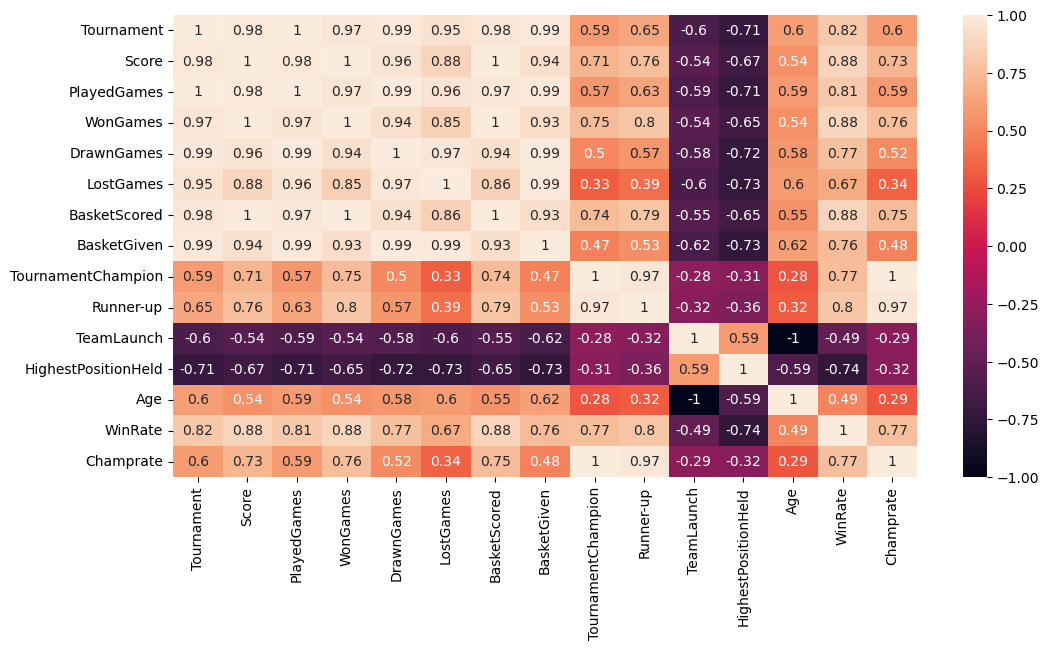

In [94]:
plt.figure(figsize = (12,6))
sns.heatmap(data_new.corr(),annot = True)

In [97]:
import plotly.express as px
fig = px.pie(data_new, values='PlayedGames', names='Team') # Mix match columns and comment on functional findings
fig.show()

In [98]:
import plotly.express as px
fig = px.scatter_matrix(data_new,dimensions=["PlayedGames", "WonGames", "LostGames"],color="Team")
fig.show()

In [106]:
# Plotting new features
import plotly.express as px
fig = px.scatter(data_new, x="Team", y="Champrate")
fig.show()

In [103]:
import plotly.express as px
fig = px.histogram(data_new, x="Age")  # Mix match columns and comment on the statistical distribution
fig.show()

In [105]:
# Plotting new features
import plotly.express as px
fig = px.scatter(data_new, x="Team", y="Champrate", color='Age')
fig.show()

#### Recommendation:

Company’s management wants to invest on proposal on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

### Answer: 

Top 5 teams that are common between below Table 1 & Table should be recommended to approach.

In [112]:
# Table 1
df2=df1.sort_values(by='WinRate',ascending=False) # Top performing teams
df2.sort_values(by='Age',ascending=True).head(10)[1:] # Top performing young teams

,Team,Age,WinRate,Champrate
55,Team 56,3,0.210526,0.0
43,Team 44,5,0.307018,0.0
56,Team 57,10,0.210526,0.0
36,Team 37,12,0.271930,0.0
24,Team 25,15,0.322368,0.0
42,Team 43,20,0.243421,0.0
20,Team 21,21,0.411765,0.0
47,Team 48,23,0.250000,0.0
48,Team 49,24,0.237500,0.0


In [111]:
# # Table 2
df2=df1.sort_values(by='Champrate',ascending=False) # Top performing teams
df2.sort_values(by='Age',ascending=True).head(10)[1:] # Top performing young teams

,Team,Age,WinRate,Champrate
55,Team 56,3,0.210526,0.0
43,Team 44,5,0.307018,0.0
56,Team 57,10,0.210526,0.0
36,Team 37,12,0.271930,0.0
24,Team 25,15,0.322368,0.0
42,Team 43,20,0.243421,0.0
20,Team 21,21,0.411765,0.0
47,Team 48,23,0.250000,0.0
48,Team 49,24,0.237500,0.0
